Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

In [21]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

In [23]:
df = pd.read_csv(r"https://stepik.org/media/attachments/course/4852/songs.csv")

In [24]:
df.columns

Index(['song', 'year', 'artist', 'genre', 'lyrics', 'length', 'commas',
       'exclamations', 'colons', 'hyphens'],
      dtype='object')

In [25]:
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [26]:
X = df.drop(['song', 'artist', 'lyrics'], axis=1)

In [27]:
X.head()

,year,genre,length,commas,exclamations,colons,hyphens
0,2007,Hip-Hop,1300,24,5,0,11
1,2006,Metal,1566,0,0,0,0
2,2006,Metal,996,1,0,1,0
3,2015,Metal,2868,5,0,0,0
4,2014,Hip-Hop,3351,22,0,0,3


In [28]:
X.genre.nunique()

3

In [29]:
X = pd.get_dummies(X)

In [30]:
X

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,1300,24,5,0,11,1,0,0
1,2006,1566,0,0,0,0,0,1,0
2,2006,996,1,0,1,0,0,1,0
3,2015,2868,5,0,0,0,0,1,0
4,2014,3351,22,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...
355,2006,972,2,0,0,1,0,0,1
356,1995,1283,33,0,0,3,0,0,1
357,1981,810,1,0,0,0,0,0,1
358,2006,1996,34,0,0,5,1,0,0


In [31]:
y = df.artist

In [32]:
y

0           gangstarr
1      blind-guardian
2      blind-guardian
3      blind-guardian
4           gangstarr
            ...      
355              abba
356              abba
357              abba
358         gangstarr
359              abba
Name: artist, Length: 360, dtype: object

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
278,2006,677,0,0,0,0,0,1,0
118,2009,1894,7,0,0,0,0,0,1
31,2009,1031,12,0,0,2,0,0,1
36,2006,306,0,0,0,0,0,1,0
153,2006,1013,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
71,2006,2891,46,0,0,9,1,0,0
106,2006,847,7,0,0,0,1,0,0
270,2008,4431,48,0,0,29,1,0,0
348,2008,1820,20,0,0,0,1,0,0


In [35]:
X_test

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
224,2006,1549,24,0,0,0,0,0,1
42,2006,3200,41,0,0,0,1,0,0
285,2006,843,16,0,0,1,0,0,1
302,1995,877,10,5,0,8,0,0,1
56,2010,1238,12,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
79,2006,2966,56,0,0,1,1,0,0
163,2006,1462,0,0,0,0,0,1,0
18,2006,2414,1,0,0,0,0,1,0
301,2007,2836,39,0,0,7,1,0,0


In [36]:
y_train

278    blind-guardian
118              abba
31               abba
36     blind-guardian
153    blind-guardian
            ...      
71          gangstarr
106         gangstarr
270         gangstarr
348         gangstarr
102              abba
Name: artist, Length: 241, dtype: object

In [37]:
y_test

224              abba
42          gangstarr
285              abba
302              abba
56               abba
            ...      
79          gangstarr
163    blind-guardian
18     blind-guardian
301         gangstarr
104              abba
Name: artist, Length: 119, dtype: object

In [38]:
max_depth_values = range(1, 100)

In [39]:
scores_data = pd.DataFrame()

In [40]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [43]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [45]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.726141
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000
...,...,...,...
193,95,cross_val_score,1.000000
194,96,cross_val_score,1.000000
195,97,cross_val_score,1.000000
196,98,cross_val_score,1.000000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

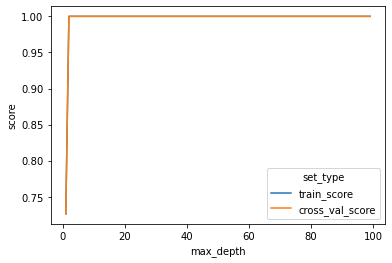

In [46]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [47]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [48]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [49]:
best_clf.score(X_test, y_test)

1.0

In [50]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

1.0

In [51]:
predictions = best_clf.predict(X_test)

In [52]:
predictions

array(['abba', 'gangstarr', 'abba', 'abba', 'abba', 'gangstarr',
       'blind-guardian', 'gangstarr', 'abba', 'blind-guardian', 'abba',
       'gangstarr', 'blind-guardian', 'gangstarr', 'gangstarr',
       'blind-guardian', 'gangstarr', 'blind-guardian', 'blind-guardian',
       'abba', 'abba', 'abba', 'gangstarr', 'blind-guardian',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'abba', 'gangstarr', 'abba', 'abba', 'gangstarr',
       'gangstarr', 'gangstarr', 'blind-guardian', 'gangstarr',
       'gangstarr', 'abba', 'abba', 'abba', 'blind-guardian', 'abba',
       'abba', 'blind-guardian', 'gangstarr', 'gangstarr', 'gangstarr',
       'blind-guardian', 'abba', 'abba', 'blind-guardian', 'abba',
       'gangstarr', 'gangstarr', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'gangstarr', 'gangstarr',
       'gangstarr', 'gangstarr', 'gangstarr', '

In [55]:
precision = precision_score(y_test, predictions, average='micro')

In [56]:
precision

1.0